# Otto商品分类——GaussianN

我们以Kaggle 2015年举办的Otto Group Product Classification Challenge竞赛数据为例，分别分别调用默认参数GaussianNB,采用log变换后的特征和TF-IDF
特征对Otto数据进行商品分类。

Otto数据集是著名电商Otto提供的一个多类商品分类问题，类别数=9. 每个样本有93维数值型特征（整数，表示某种事件发生的次数，已经进行过脱敏处理）。 竞赛官网：https://www.kaggle.com/c/otto-group-product-classification-challenge/data


In [2]:
# 首先 import 必要的模块
import pandas as pd 
import numpy as np

## 读取数据 

In [11]:
# 读取数据
# path to where the data lies
dpath = './data/'

# 由于原始特征明显不是高斯分布，因此不能采用GaussianNB。
# 考虑对log变换后的特征和TD-IDF特征采用GaussianNB
train = pd.read_csv(dpath +"Otto_FE_train_log.csv")
train.head()

,id,feat_1_log,feat_2_log,feat_3_log,feat_4_log,feat_5_log,feat_6_log,feat_7_log,feat_8_log,feat_9_log,...,feat_85_log,feat_86_log,feat_87_log,feat_88_log,feat_89_log,feat_90_log,feat_91_log,feat_92_log,feat_93_log,target
0,1,0.167949,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.172195,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.159571,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.159571,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.167949,0.0,0.0,0.162608,0.649561,0.289065,0.489076,0.000000,0.0,...,0.000000,0.165443,0.260365,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.172195,0.000000,0.000000,0.0,0.0,0.142178,0.0,0.0,0.0,Class_1


Text(0,0.5,u'Number of occurrences')

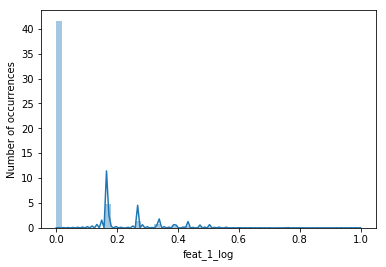

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(train.feat_1_log);
plt.xlabel('feat_1_log');
plt.ylabel('Number of occurrences')

In [4]:
#train.info()

## 准备数据

In [14]:
# 将类别字符串变成数字
# drop ids and get labels
y_train = train['target']   #形式为Class_x
X_train = train.drop(["id", "target"], axis=1)

#保存特征名字以备后用（可视化）
feat_names = X_train.columns 

## 模型训练

### 默认参数的 GaussianNB

In [8]:
from sklearn.naive_bayes import GaussianNB

In [15]:
#1. 生成学习器实例
GaussNB = GaussianNB()

#2. 模型训练
GaussNB.fit(X_train, y_train)

#3. 保持模型，用于后续测试
import cPickle
cPickle.dump(GaussNB, open("Otto_GaussianNB_log.pkl", 'wb'))